# 테크닉1 : 데이터를 읽어 들이자

In [5]:
import pandas as pd

customer_master = pd.read_csv("./pyda100-master/Chapter_1/customer_master.csv")
display(customer_master)

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시
...,...,...,...,...,...,...,...,...
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시


In [7]:
item_master = pd.read_csv("./pyda100-master/Chapter_1/item_master.csv")
display(item_master)

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [8]:
transaction_1 = pd.read_csv("./pyda100-master/Chapter_1/transaction_1.csv")
transaction_2 = pd.read_csv("./pyda100-master/Chapter_1/transaction_2.csv")
display(transaction_1)
display(transaction_2)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [9]:
transaction_detail_1 = pd.read_csv("./pyda100-master/Chapter_1/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("./pyda100-master/Chapter_1/transaction_detail_2.csv")
display(transaction_detail_1)
display(transaction_detail_2)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


# 테크닉2 : 데이터를 결합(유니언)해 보자

In [30]:
print("* transaction_1 length :", len(transaction_1))
print("* transaction_2 length :", len(transaction_2), "\n")

transaction_ = pd.concat([transaction_1, transaction_2])
print("* transaction_ length :", len(transaction_))
display(transaction_)

* transaction_1 length : 5000
* transaction_2 length : 1786 

* transaction_ length : 6786


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [11]:
print("* transaction_detail_1 length :", len(transaction_detail_1))
print("* transaction_detail_2 length :", len(transaction_detail_2), "\n")

transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2])
print("transaction_detail length :", len(transaction_detail))
display(transaction_detail)

* transaction_detail_1 length : 5000
* transaction_detail_2 length : 2144 

transaction_detail length : 7144


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


# 테크닉3 : 매출 데이터끼리 결합(조인)해 보자

In [41]:
from pandasql import sqldf

# join_data = pd.merge(transaction_detail, transaction.loc[:, ["transaction_id", "payment_date", "customer_id", "price"]], on = "transaction_id", how = "left")
join_data = sqldf("""
                        SELECT  X.transaction_id, 
                                Y.detail_id, 
                                Y.item_id, 
                                Y.quantity, 
                                X.customer_id, 
                                X.payment_date
                        FROM   transaction_ X 
                        LEFT JOIN transaction_detail Y 
                        ON X.transaction_id = Y.transaction_id 
                 """)
print("* join_data :")
display(join_data)

multiple_transaction_id_in_join_data = sqldf("""
                                                SELECT *
                                                FROM (
                                                SELECT  X.transaction_id, 
                                                        Y.detail_id, 
                                                        Y.item_id, 
                                                        Y.quantity, 
                                                        X.customer_id, 
                                                        X.payment_date,
                                                        COUNT(1) OVER(PARTITION BY X.transaction_id) AS CNT 
                                                FROM   transaction_ X 
                                                LEFT JOIN transaction_detail Y 
                                                ON X.transaction_id = Y.transaction_id
                                                )
                                                WHERE CNT >= 2    
                                            """)
print("* transaction_id that has multiple records in join_data :")
display(multiple_transaction_id_in_join_data)

* join_data :


,transaction_id,detail_id,item_id,quantity,customer_id,payment_date
0,T0000000113,0,S005,1,PL563502,2019-02-01 01:36:57
1,T0000000114,1,S001,1,HD678019,2019-02-01 01:37:23
2,T0000000115,2,S003,1,HD298120,2019-02-01 02:34:19
3,T0000000116,3,S005,1,IK452215,2019-02-01 02:47:23
4,T0000000117,4,S002,2,PL542865,2019-02-01 04:33:46
...,...,...,...,...,...,...
7139,T0000006894,7139,S004,1,HI400734,2019-07-31 21:20:44
7140,T0000006895,7140,S002,1,AS339451,2019-07-31 21:52:48
7141,T0000006896,7141,S001,2,OA027325,2019-07-31 23:35:25
7142,T0000006897,7142,S002,1,TS624738,2019-07-31 23:39:35


* transaction_id that has multiple records in join_data :


,transaction_id,detail_id,item_id,quantity,customer_id,payment_date,CNT
0,T0000000194,81,S002,1,HD699115,2019-02-03 18:03:07,2
1,T0000000194,82,S005,1,HD699115,2019-02-03 18:03:07,2
2,T0000000208,96,S003,1,AS359364,2019-02-04 00:53:35,2
3,T0000000208,97,S001,1,AS359364,2019-02-04 00:53:35,2
4,T0000000219,108,S003,1,HD819739,2019-02-04 09:20:01,2
...,...,...,...,...,...,...,...
692,T0000006829,7072,S003,1,GD862018,2019-07-30 07:26:30,2
693,T0000006864,7107,S001,1,IK341016,2019-07-31 03:42:20,2
694,T0000006864,7108,S001,1,IK341016,2019-07-31 03:42:20,2
695,T0000006884,7128,S001,1,PL491769,2019-07-31 18:12:37,2


# 테크닉4 : 마스터데이터를 결합(조인)해보자

In [42]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data

,transaction_id,detail_id,item_id,quantity,customer_id,payment_date,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,T0000000113,0,S005,1,PL563502,2019-02-01 01:36:57,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,T0000000114,1,S001,1,HD678019,2019-02-01 01:37:23,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,T0000000115,2,S003,1,HD298120,2019-02-01 02:34:19,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,T0000000116,3,S005,1,IK452215,2019-02-01 02:47:23,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,T0000000117,4,S002,2,PL542865,2019-02-01 04:33:46,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,7139,S004,1,HI400734,2019-07-31 21:20:44,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000
7140,T0000006895,7140,S002,1,AS339451,2019-07-31 21:52:48,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000
7141,T0000006896,7141,S001,2,OA027325,2019-07-31 23:35:25,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000
7142,T0000006897,7142,S002,1,TS624738,2019-07-31 23:39:35,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000


# 테크닉 5 : 필요한 데이터 컬럼을 만들자

In [44]:
join_data["price"] = join_data["item_price"] * join_data["quantity"]
print("* df_having_cols_about_price :")
display(sqldf("SELECT quantity, item_price, price FROM join_data"))

* df_having_cols_about_price :


,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000
...,...,...,...
7139,1,180000,180000
7140,1,85000,85000
7141,2,50000,100000
7142,1,85000,85000


# 테크닉 6 : 데이터를 검산하자


In [47]:
sum_price_in_join_data = join_data["price"].sum()
sum_price_in_transaction = transaction["price"].sum()
print("* sum_price_in_join_data :", sum_price_in_join_data)
print("* sum_price_in_transaction :", sum_price_in_transaction, "\n")

if join_data["price"].sum() == transaction["price"].sum() :
    
    print("* result is good")

else :

    print("* result is bad")

* sum_price_in_join_data : 971135000
* sum_price_in_transaction : 971135000 

* result is good


# 테크닉 7 : 각종 통계량을 파악하자

In [52]:
print("* 데이터 값이 null인지 나타내는 dataframe :")
display(join_data.isnull())

print("* 각 컬럼의 null 개수 :")
join_data.isnull().sum()

* 데이터 값이 null인지 나타내는 dataframe :


,transaction_id,detail_id,item_id,quantity,customer_id,payment_date,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


* 각 컬럼의 null 개수 :


transaction_id       0
detail_id            0
item_id              0
quantity             0
customer_id          0
payment_date         0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [54]:
print("* 각 정량적 컬럼들에 대한 통계량 :")
display(join_data.describe())

* 각 정량적 컬럼들에 대한 통계량 :


,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


# 테크닉 8 : 월별로 데이터를 집계해 보자

In [55]:
print("* 데이터 셋 내 모든 컬럼의 데이터 타입 출력 :")
join_data.dtypes

* 데이터 셋 내 모든 컬럼의 데이터 타입 출력 :


transaction_id       object
detail_id             int64
item_id              object
quantity              int64
customer_id          object
payment_date         object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [62]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])      # string type 컬럼을 datetime type 컬럼으로 변형하는 방법
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m") # datetime type 컬럼을 지정한 format의 string type 컬럼으로 변경 방법

display(sqldf("SELECT payment_date, payment_month FROM join_data"))

,payment_date,payment_month
0,2019-02-01 01:36:57.000000,201902
1,2019-02-01 01:37:23.000000,201902
2,2019-02-01 02:34:19.000000,201902
3,2019-02-01 02:47:23.000000,201902
4,2019-02-01 04:33:46.000000,201902
...,...,...
7139,2019-07-31 21:20:44.000000,201907
7140,2019-07-31 21:52:48.000000,201907
7141,2019-07-31 23:35:25.000000,201907
7142,2019-07-31 23:39:35.000000,201907


In [63]:
print("* 월별 매출합 :")
join_data.groupby("payment_month").sum()["price"]

* 월별 매출합 :


payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

# 테크닉 9 :월별, 상품별로 데이터를 집계해 보자

In [91]:
print("* 월별&상품별 매출합 및 팔린 상품 개수합 :")
price_and_quantity_by_month_and_item = sqldf("""
                                                SELECT payment_month, 
                                                       item_name, 
                                                       sum(price) AS price, 
                                                       sum(quantity) AS quantity 
                                                FROM join_data
                                                GROUP BY payment_month, item_name
                                            """)

# price_and_quantity_by_month_and_item = sqldf("""
#                                                 SELECT *
#                                                 FROM (
#                                                     SELECT payment_month, 
#                                                         item_name, 
#                                                         sum(price) AS price, 
#                                                         sum(quantity) AS quantity 
#                                                     FROM join_data
#                                                     GROUP BY payment_month, item_name
#                                                 )
#                                                 WHERE (payment_month != '201907' OR item_name != 'PC-E')
#                                             """)

display(price_and_quantity_by_month_and_item)


* 월별&상품별 매출합 및 팔린 상품 개수합 :


,payment_month,item_name,price,quantity
0,201902,PC-A,24150000,483
1,201902,PC-B,25245000,297
2,201902,PC-C,19800000,165
3,201902,PC-D,31140000,173
4,201902,PC-E,59850000,285
5,201903,PC-A,26000000,520
6,201903,PC-B,25500000,300
7,201903,PC-C,19080000,159
8,201903,PC-D,25740000,143
9,201903,PC-E,64050000,305


In [95]:
print("* 'price_and_quantity_by_month_and_item'에 대한 pivot table :")
pivot_table_for_price_and_quantity_by_month_and_item = pd.pivot_table(price_and_quantity_by_month_and_item, index = "item_name", columns = "payment_month", values = ["price", "quantity"])
display(pivot_table_for_price_and_quantity_by_month_and_item)

* 'price_and_quantity_by_month_and_item'에 대한 pivot table :


price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

# 테크닉 10 : 상품별 매출 추이를 가시화해 보자

In [96]:
print("* 월별&상품별 판매금액에 대한 pivot table :")
pivot_table_for_price_by_month_and_item = pd.pivot_table(price_and_quantity_by_month_and_item, index = "payment_month", columns = "item_name", values = "price")
pivot_table_for_price_by_month_and_item

* 월별&상품별 판매금액에 대한 pivot table :


item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


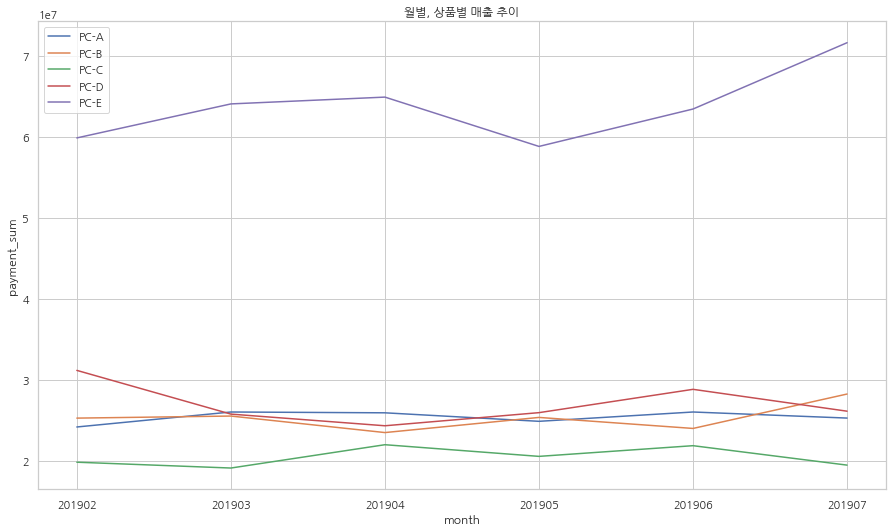

In [98]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.figure(figsize = (12.5, 7.5))

plt.plot(list(pivot_table_for_price_by_month_and_item.index), pivot_table_for_price_by_month_and_item["PC-A"], label = "PC-A")
plt.plot(list(pivot_table_for_price_by_month_and_item.index), pivot_table_for_price_by_month_and_item["PC-B"], label = "PC-B")
plt.plot(list(pivot_table_for_price_by_month_and_item.index), pivot_table_for_price_by_month_and_item["PC-C"], label = "PC-C")
plt.plot(list(pivot_table_for_price_by_month_and_item.index), pivot_table_for_price_by_month_and_item["PC-D"], label = "PC-D")
plt.plot(list(pivot_table_for_price_by_month_and_item.index), pivot_table_for_price_by_month_and_item["PC-E"], label = "PC-E")
plt.title("월별, 상품별 매출 추이")
plt.xlabel("month")
plt.ylabel("payment_sum")
plt.legend()

plt.tight_layout()
plt.show()